In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,7)

from datetime import timedelta 

In [196]:
appoint_data = pd.read_csv('KaggleV2-May-2016.csv')
appoint_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
appoint_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
appoint_data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [197]:
appoint_data['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [11]:
appoint_data[appoint_data['No-show'] == 'Yes']

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,M,2016-04-26T08:44:12Z,2016-04-29T00:00:00Z,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,F,2016-04-28T09:28:57Z,2016-04-29T00:00:00Z,40,CONQUISTA,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,F,2016-04-27T07:51:14Z,2016-04-29T00:00:00Z,30,NOVA PALESTINA,0,0,0,0,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,5.133650e+14,5772155,F,2016-06-03T14:43:56Z,2016-06-07T00:00:00Z,45,BARRO VERMELHO,0,0,0,0,0,0,Yes
110492,6.456342e+14,5786741,M,2016-06-08T08:50:19Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes
110496,8.544295e+13,5779046,F,2016-06-06T17:35:38Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,1,0,0,0,0,Yes
110515,6.456342e+14,5778621,M,2016-06-06T15:58:05Z,2016-06-08T00:00:00Z,33,MARIA ORTIZ,0,1,0,0,0,0,Yes


# Are there any repetitive offenders?

In [199]:
# Marking duplicate values except for the latest oppointment
appoint_data['is_duplicated'] = appoint_data.duplicated(subset=['PatientId'], keep = 'last')
appoint_data['is_duplicated']

0          True
1          True
2          True
3          True
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: is_duplicated, Length: 110527, dtype: bool

In [200]:
appoint_data[appoint_data['is_duplicated']]['No-show'].value_counts(normalize = True)

No     0.79062
Yes    0.20938
Name: No-show, dtype: float64

In [201]:
appoint_data['No-show'].value_counts(normalize = True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

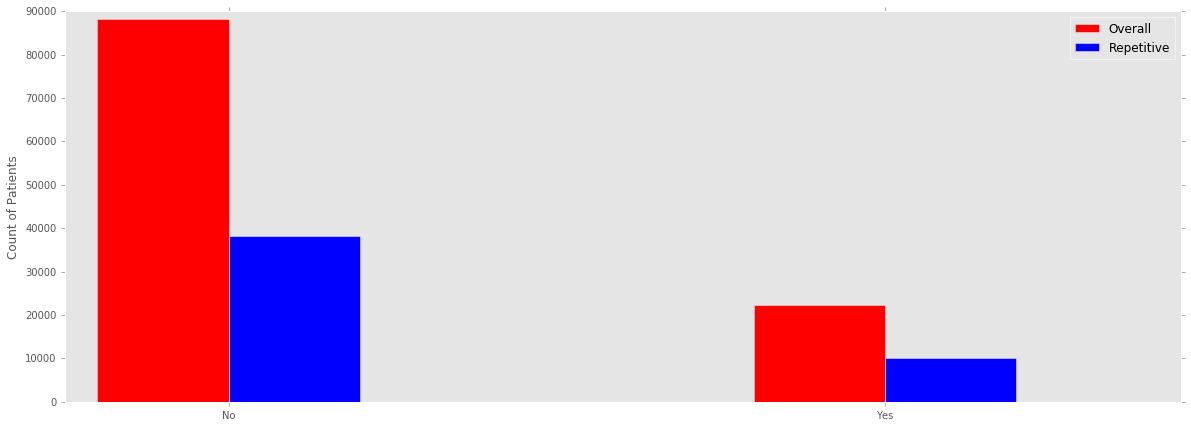

In [202]:
appoint_data['No-show'].value_counts().plot.bar(width = 0.2, color = 'r', position  = 1, legend = True, rot = 0)
appoint_data[appoint_data['is_duplicated']]['No-show'].value_counts().plot.bar(width = 0.2, color = 'b', position = 0, legend = True, rot = 0)
plt.legend(['Overall', 'Repetitive'])
plt.grid(b = False)
plt.ylabel('Count of Patients')
plt.show()

In [205]:
appoint_data['ScheduledDay'] = pd.to_datetime(appoint_data['ScheduledDay'])

appoint_data['AppointmentDay'] = pd.to_datetime(appoint_data['AppointmentDay'])

# Wait time vs No-shows

In [206]:
convert_hours = lambda x: x.days + 1
appoint_data['WaitTime'] = (appoint_data['AppointmentDay'] - appoint_data['ScheduledDay'])
appoint_data['WaitTimeDays'] = appoint_data['WaitTime'].apply(convert_hours)

In [212]:
wait_time_perc = appoint_data['WaitTimeDays'].value_counts(normalize = True).cumsum() * 100
wait_time_perc.head(30)

0     34.890117
2     40.974603
4     45.760764
1     50.477259
7     54.915993
6     58.568495
5     61.533381
14    64.168936
3     66.645254
8     68.755146
21    70.438897
28    71.982412
13    73.504212
9     74.956346
15    76.316194
10    77.574710
20    78.648656
22    79.709935
16    80.751310
12    81.760113
17    82.761678
29    83.746958
19    84.691523
18    85.615280
27    86.531798
11    87.424792
35    88.296072
23    89.039782
34    89.770825
26    90.432202
Name: WaitTimeDays, dtype: float64

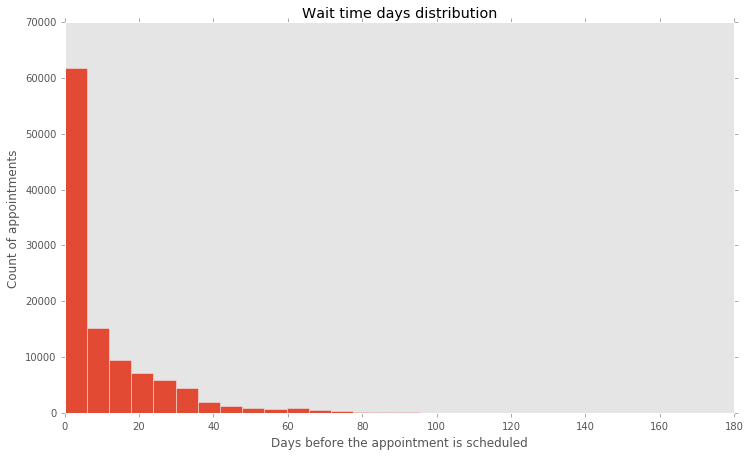

In [231]:
appoint_data[appoint_data['WaitTimeDays'] >=0]['WaitTimeDays'].hist(bins = 30, )
plt.title('Wait time days distribution')
plt.ylabel('Count of appointments')

plt.xlabel('Days before the appointment is scheduled')
plt.grid(b = False)
plt.show()

In [234]:
appoint_data[appoint_data['WaitTimeDays'] == 0]['No-show'].value_counts(normalize = True) * 100

No     95.353059
Yes     4.646941
Name: No-show, dtype: float64

# Age vs No-shows

In [311]:
appoint_data['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [240]:
appoint_data['age_bins'] = pd.cut(x = appoint_data['Age'], bins = [-1,10, 20, 30, 40, 50, 60, 115], 
                                  labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-115'])

In [315]:
appoint_data['age_bins'].values.unique()

[60-115, 50-60, 0-10, 20-30, 30-40, 10-20, 40-50, NaN]
Categories (7, object): [0-10 < 10-20 < 20-30 < 30-40 < 40-50 < 50-60 < 60-115]

In [291]:
age_bins_count = appoint_data['age_bins'].value_counts().reset_index()
age_bins_count.columns = ['age_bins', 'count']
age_bins_no_show_count = appoint_data[appoint_data['No-show'] == 'Yes']['age_bins'].value_counts().reset_index()
age_bins_no_show_count.columns = ['age_bins', 'no_show']

age_bins = age_bins_count.merge(age_bins_no_show_count, on = 'age_bins')
age_bins['no_show_perc'] = ((1 * age_bins['no_show'] / age_bins['count']) * 100).round(2)
age_bins.sort_values(by='age_bins', inplace = True)

age_bins['total_perc'] = (1*age_bins['count'] / sum(age_bins['count']) * 100).round(2)

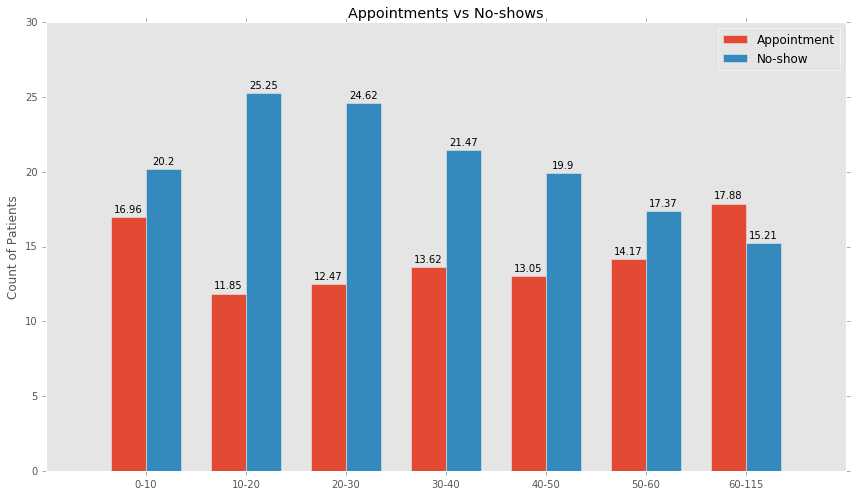

In [317]:
labels= age_bins['age_bins']
width = 0.35
x = np.arange(len(age_bins['age_bins']))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, age_bins['total_perc'], width, label='Appointment')
rects2 = ax.bar(x + width/2, age_bins['no_show_perc'], width, label='No-show')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count of Patients')
ax.set_title('Appointments vs No-shows')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(b = False)

def autolabel(rects, counts):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect, val in zip(rects, counts):
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, age_bins['count'].values.tolist())
autolabel(rects2, age_bins['no_show'].values.tolist())

fig.tight_layout()


plt.show()

In [302]:
age_bins

,age_bins,count,no_show,no_show_perc,total_perc
1,0-10,18749,3788,20.20,16.96
6,10-20,13099,3308,25.25,11.85
5,20-30,13783,3394,24.62,12.47
3,30-40,15052,3232,21.47,13.62
4,40-50,14420,2870,19.90,13.05
2,50-60,15661,2721,17.37,14.17
0,60-115,19762,3006,15.21,17.88


In [308]:
age_bins_count = (appoint_data['age_bins'].value_counts(normalize = True)*100).round(2).reset_index()
age_bins_count.columns = ['age_bins', 'count_normalize']
age_bins_no_show_count = (appoint_data[appoint_data['No-show'] == 'Yes']['age_bins'].value_counts(normalize = True) * 100).round(2).reset_index()
age_bins_no_show_count.columns = ['age_bins', 'no_show_normalize']

age_bins_normalize = age_bins_count.merge(age_bins_no_show_count, on = 'age_bins')
age_bins_normalize.sort_values(by='age_bins', inplace = True)

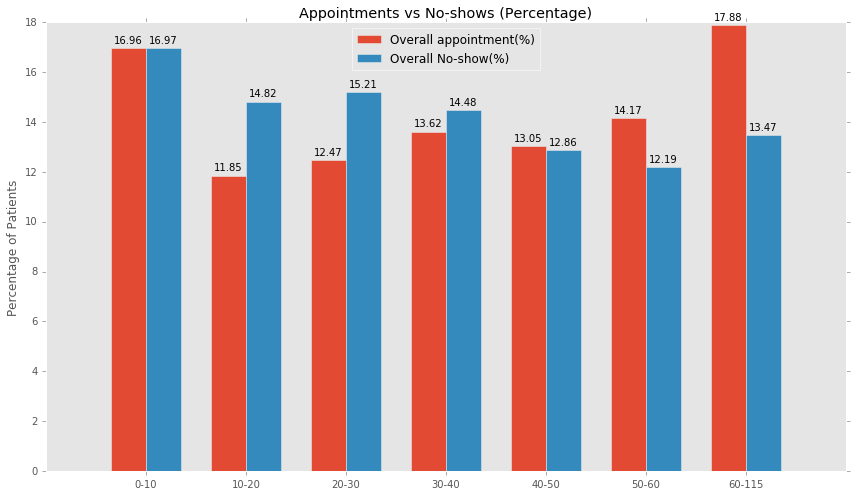

In [316]:
labels= age_bins_normalize['age_bins']
width = 0.35
x = np.arange(len(age_bins_normalize['age_bins']))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, age_bins_normalize['count_normalize'], width, label='Overall appointment(%)')
rects2 = ax.bar(x + width/2, age_bins_normalize['no_show_normalize'], width, label='Overall No-show(%)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Patients')
ax.set_title('Appointments vs No-shows (Percentage)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc = 0)
ax.grid(b = False)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()


plt.show()